In [2]:
import msprime, tskit, time, tsinfer
import pandas as pd
import numpy as np
from IPython.display import SVG
import plotly.graph_objects as go
# from algorithm._metric_ import (node_tree_discrepancy, discrepancy)
# import tsdate
import plotly.io
from tqdm import tqdm
from plotly.subplots import make_subplots
from tqdm import tqdm
from time import time
# from COPYevaluation import node_spans, tree_discrepancy
from tscompare import node_spans, compare
import matplotlib.pyplot as plt

colors = {'blue': 'rgb(46,37,133)',
          'red': 'rgb(194,106,119)',
          'lgreen': 'rgb(93,168,153)',
          'gold': 'rgb(220,205,125)',
          'green': 'rgb(51, 117,56)',
          
          'lblue': 'rgb(148,203,236)',
          'magenta': 'rgb(159,74,150)',
          'wine': 'rgb(126,041,084)', 
         }

## Figure 4.
Node spans of simulated tree sequence (blue), simplified tree sequence (green), and extended tree sequence (red).
\comment{TODO: nodes should be in the same order in all three lines,
using the ordering from the true tree sequence.}
\comment{TODO: somehow communicate per-node amount/proportion of correctly and incorrectly added span}

Should be $2\times 2$ subplot. (2nd row is 1 subplot)
1. [x] $(1,1)$ added span per node histogram (removing 0 spans)
2. [x] $(1,2)$ added span vs incorrectly added span subplot (removing 0 spans)
3. [x] $(2,1)$ comparitive spans between truth/simplified
4. [x] $(2,2)$ comparitive spans between truth/simplified-extended

In [4]:
s = tskit.load('trees/ts_1000s_1e8')

In [5]:
s

In [3]:
df = pd.read_csv('figure-data/figure4-nodespans.csv')
tsnodes = df['S-node-span']
added = df['SSE-added-span'].values
addedwrong = df['SSE-added-wrong'].values
stsnodes = df['SS-node-span']
etsnodes = df['SSE-node-span']

In [3]:
np.all(stsnodes.values <= etsnodes.values)

True

In [4]:
df

,Unnamed: 0,S-node-span,SSE-added-span,SSE-added-wrong,SS-node-span,SSE-node-span
0,0,100000000.0,0.0,0.0,100000000.0,100000000.0
1,1,100000000.0,0.0,0.0,100000000.0,100000000.0
2,2,100000000.0,0.0,0.0,100000000.0,100000000.0
3,3,100000000.0,0.0,0.0,100000000.0,100000000.0
4,4,100000000.0,0.0,0.0,100000000.0,100000000.0
...,...,...,...,...,...,...
23646,23646,1743.0,0.0,0.0,1743.0,1743.0
23647,23647,147.0,0.0,0.0,147.0,147.0
23648,23648,3291.0,0.0,0.0,3291.0,3291.0
23649,23649,19540.0,0.0,0.0,13236.0,13236.0


In [4]:
'format'
a = added[added!=0]
w = addedwrong[added!=0]
order = np.argsort(tsnodes)
t = tsnodes[order]
s = stsnodes[order]
e = etsnodes[order]

In [150]:
np.mean(w/a), np.count_nonzero(w)/w.shape[0], w.shape
ww = w[w !=0]
aa = a[w !=0]

In [91]:
np.count_nonzero(addedwrong)/addedwrong.shape[0], addedwrong.shape, np.count_nonzero(addedwrong)

(0.04092850196609023, (23651,), 968)

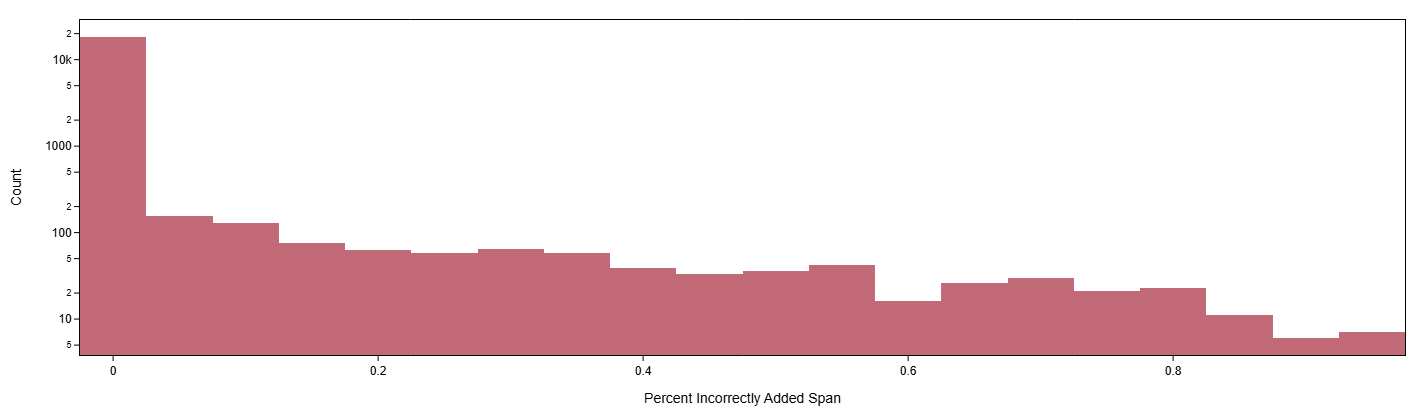

In [156]:
'alt graph'
f = go.Figure()
f.add_trace(go.Histogram(x=(w/a), marker=dict(color=colors['red']), nbinsx=20))
f.update_yaxes(type='log', title='Count')
f.update_xaxes(title='Percent Incorrectly Added Span')
f.update_layout(width=6.5*118.11, height=3.5*118.11)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
f.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
f.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
f.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

f.show()
plotly.io.write_image(f,'figure-data/Figure4S-plt-includezeros.pdf', format='pdf')

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("A)","B)","C)", "D)"),
                   horizontal_spacing=0.13, vertical_spacing=0.14)

fig.add_trace(go.Histogram(x=a, marker=dict(color=colors['red']), nbinsx=20), row=1, col=1)
fig.add_trace(go.Scatter(x=w, y=a, marker=dict(color=colors['red'], size=3, opacity=0.5), mode='markers'), row=1,col=2)
for (data,color,col) in [(e, colors['red'],2), (s, colors['lgreen'],1),(t, colors['blue'],1),(t, colors['blue'],2)]:
    fig.add_trace(go.Scatter(x=np.arange(data.shape[0]), y=data, mode='markers', marker=dict(color=color, opacity=0.3, size=3)), row=2, col=col)

fig.update_layout(width=118.11*6.5, height=118.11*4.5) #change height to make it work
fig.update_xaxes(title= 'Edge Span Added', exponentformat='e', row=1,col=1, title_standoff=3)
fig.update_xaxes(title= 'Percent incorrectly Added Span', exponentformat='e', row=1, col=2, title_standoff=3)
fig.update_yaxes(title= 'Count', type='log', row=1, col=1)
fig.update_yaxes(title="Count", exponentformat='e', row=1, col=2, title_standoff =3)
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=1)
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=2, title_standoff=3)
fig.update_xaxes(title='Rank', row=2,col=1)
fig.update_xaxes(title='Rank', row=2,col=2)
fig.layout.annotations[0].update(x=0.025)
fig.layout.annotations[2].update(x=0.025)
fig.layout.annotations[1].update(x=0.575)
fig.layout.annotations[3].update(x=0.575)
fig.update_layout(showlegend=False)
# plotly.io.write_image(fig,'figure-data/figure-4-2.pdf', format='pdf')

In [49]:
np.count_nonzero(added), added.shape, np.max(added), np.max(addedwrong)

(19303, (23651,), 99736095.0, 49937267.0)

In [59]:
addedcorrect = a-w
propincorrect = w/a

In [64]:
np.count_nonzero(propincorrect), np.mean(propincorrect)

(968, 0.014196537198293906)

In [6]:
# No removal of extra zeros
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("A)","B)","C)", "D)"),
                   horizontal_spacing=0.13, vertical_spacing=0.14)

fig.add_trace(go.Histogram(x=added, marker=dict(color=colors['red']), nbinsx=20), row=1, col=1)
fig.add_trace(go.Scatter(x=added+1, y=addedwrong+1, marker=dict(color=colors['red'], size=3, opacity=0.2), mode='markers'), row=1,col=2)
fig.add_trace(go.Scatter(x=np.linspace(0,1e8,num=1000), y = np.linspace(0,1e8,num=1000), mode='lines', marker=dict(color=colors['blue'])), row=1,col=2)
fig.add_trace(go.Histogram(x=(w/a), marker=dict(color=colors['red']), nbinsx=20), row=1, col=2)
fig.update_yaxes(type='log', title='Count', row=1,col=2)
fig.update_xaxes(title='Percent Incorrectly Added Span', row=1, col=2)
for (data,color,col) in [(e, colors['red'],2), (s, colors['lgreen'],1),(t, colors['blue'],1),(t, colors['blue'],2)]:
    fig.add_trace(go.Scatter(x=np.arange(data.shape[0]), y=data, mode='markers', marker=dict(color=color, opacity=0.3, size=3)), row=2, col=col)

fig.update_layout(width=118.11*6.5, height=118.11*4.5) #change height to make it work
fig.update_xaxes(title= 'Edge Span Added', exponentformat='e', row=1,col=1, title_standoff=3)
fig.update_xaxes(title= 'Added Span', type='log', exponentformat='e', row=1, col=2, title_standoff=3,
                tickmode='array', tickvals = np.array([1,100,1e4,1e6,1e8]),ticktext=['1', '100', '1e+4', '1e+6', '1e+8'])
fig.update_yaxes(title= 'Count', type='log', row=1, col=1)
fig.update_yaxes(title="Incorrectly Added Span", type='log', exponentformat='e', row=1, col=2, title_standoff =3,
                tickmode='array', tickvals = np.array([1,100,1e4,1e6,1e8]), ticktext=['1', '100', '1e+4', '1e+6', '1e+8'])
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=1)
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=2, title_standoff=3)
fig.update_xaxes(title='Rank', row=2,col=1)
fig.update_xaxes(title='Rank', row=2,col=2)
fig.layout.annotations[0].update(x=0.025)
fig.layout.annotations[2].update(x=0.025)
fig.layout.annotations[1].update(x=0.575)
fig.layout.annotations[3].update(x=0.575)
fig.update_layout(showlegend=False)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
fig.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
fig.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
fig.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

plotly.io.write_image(fig,'figure-data/Figure4-plt.pdf', format='pdf')

## Figure 5

Dissimilarity $(2\times 2)$ subplot. For each plot we want dissimilarity between 
 - S v SS
 - S v SSE
 - S v I
 - S v IS
 - S v IE
 - S v ISE

1. [x] The first row of plots will be the dissimilarity over sample $(1,1)$ and number of trees $(1,2)$.
2. [x] The second row of plots will be the true proportion represented over sample $(2,1)$ and number of trees $(2,2)$.

In [3]:
samplelist = [10, 50, 100, 500, 1000]
lengthlist = [1e6, 5e6, 1e7, 3e7, 5e7]
names = ['1e6', '5e6', '1e7', '3e7', '5e7']
sample_dis = pd.read_csv('figure-data/figure6-arf-over-sample.csv')
# sample_rmse = pd.read_csv('figure-data/figure5-rmse.csv')
sample_tp = pd.read_csv('figure-data/figure6-tpr-over-sample.csv')
length_dis = pd.read_csv('figure-data/figure6-arf-over-length.csv')
# length_rmse = pd.read_csv('figure-data/figure5-rmse-over-length.csv')
length_tp = pd.read_csv('figure-data/figure6-tpr-over-length.csv')

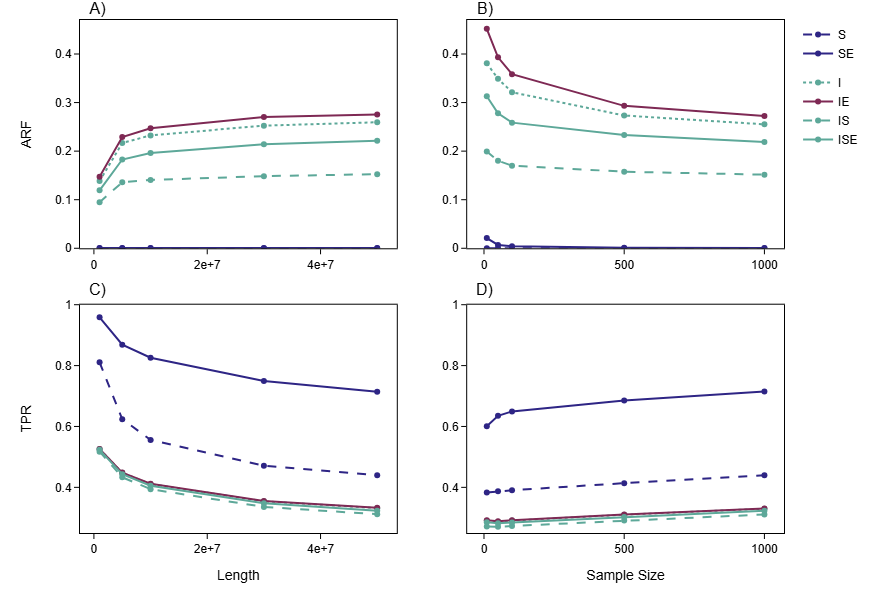

In [30]:
f = make_subplots(rows = 2, cols =2,
                  vertical_spacing=0.11,
                  subplot_titles=['A)','B)','C)','D)'])
for (i, name, group, color, dash, boo) in zip([0,1,6,7,8,9], 
                                         ['S','SE','I','IE','IS', 'ISE'],
                                         ['S', 'S', 'I', 'I', 'I', 'I'],
                                         ['blue', 'blue', 'lgreen', 'wine','lgreen', 'lgreen'],
                                         ['dash', None, 'dot', None, 'dash', None],
                                         [True, False, False, False, False, False]):
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=True), row=1, col=1)
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_tp.iloc[i].values[1:],
        mode='lines+markers',line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=1)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=1, col=2)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_tp.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color], dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=2)
f.update_xaxes(title='Sample Size', row=2, col=2)
f.update_yaxes(title='ARF', row=1, col=1, range=[0,0.47])
f.update_yaxes(row=1,col=2, range=[0,0.47])
f.update_yaxes(title='TPR', row=2,col=1, range=[0.25,1])
f.update_yaxes(row=2,col=2, range=[0.25,1])
f.update_xaxes(title='Length', row=2,col=1, exponentformat='e')
f.update_xaxes(row=1, col=1, exponentformat='e')

f.update_layout(width=118.11*6.5, height=118.11*5)
# f.layout.annotations[0].update(x=-0.03)
# f.layout.annotations[2].update(x=-0.03)
# f.layout.annotations[1].update(x=0.525)
# f.layout.annotations[3].update(x=0.525)
f.layout.annotations[0].update(x=0.025,y=1.001)
f.layout.annotations[2].update(x=0.025,y=0.455)
f.layout.annotations[1].update(x=0.575,y=1.001)
f.layout.annotations[3].update(x=0.575,y=0.455)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
f.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
f.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
f.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

f.show()

f.write_image('figure6-ARF-TPR-plt3.pdf', format='pdf', width=118.11*6.5, height=4.5*118.11)

In [29]:
'analyze new data'
samplelist = [10, 50, 100, 500, 1000]
lengthlist = [1e6, 5e6, 1e7, 3e7, 5e7]
names = ['1e6', '5e6', '1e7', '3e7', '5e7']
sample_dis = pd.read_csv('figure6-arf-over-sample.csv')
sample_tp = pd.read_csv('figure6-tpr-over-sample.csv')
length_dis = pd.read_csv('figure6-arf-over-length.csv')
length_tp = pd.read_csv('figure6-tpr-over-length.csv')
length_dis = length_dis.drop(length_dis.index[6:8])
length_tp = length_tp.drop(length_tp.index[6:8])
sample_dis = sample_dis.reindex([0,1,2,3,4,5,7,6,8,9])
sample_tp = sample_tp.reindex([0,1,2,3,4,5,7,6,8,9])

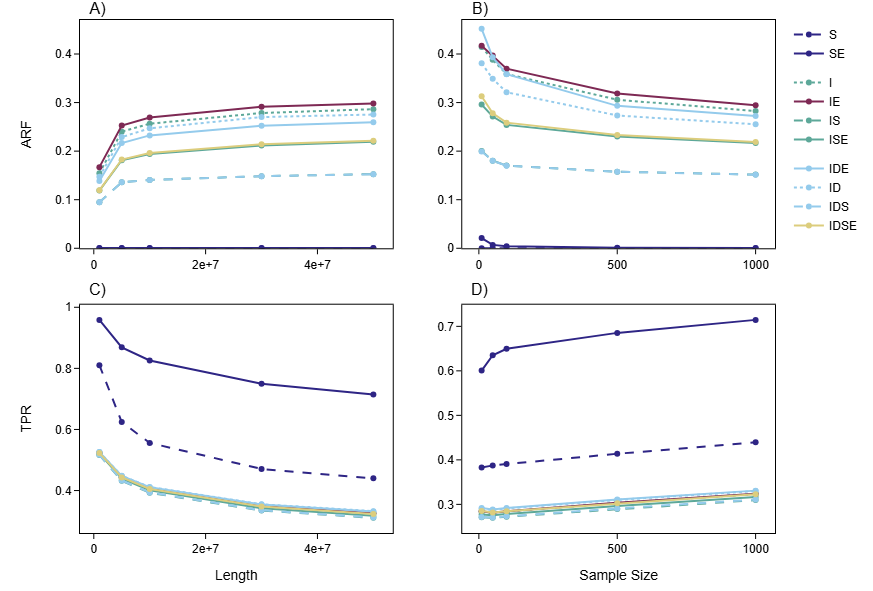

In [17]:
f = make_subplots(rows = 2, cols =2,
                  vertical_spacing=0.11,
                  subplot_titles=['A)','B)','C)','D)'])
for (i, name, group, color, dash, boo) in zip(sample_dis.index, 
                                         ['S','SE','I','IE','IS', 'ISE', 'IDE', 'ID', 'IDS', 'IDSE'],
                                         ['S', 'S', 'I', 'I', 'I', 'I', 'D', 'D', 'D', 'D'],
                                         ['blue', 'blue', 'lgreen', 'wine','lgreen', 'lgreen', 'lblue', 'lblue', 'lblue','gold'],
                                         ['dash', None, 'dot', None, 'dash', None, None, 'dot', 'dash', None],
                                         [True, False, False, False, False, False, False, False, False, False]):
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=True), row=1, col=1)
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_tp.iloc[i].values[1:],
        mode='lines+markers',line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=1)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=1, col=2)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_tp.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color], dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=2)
f.update_xaxes(title='Sample Size', row=2, col=2)
f.update_yaxes(title='ARF', row=1, col=1, range=[0,0.47])
f.update_yaxes(row=1,col=2, range=[0,0.47])
f.update_yaxes(title='TPR', row=2,col=1)
f.update_yaxes(row=2,col=2)
f.update_xaxes(title='Length', row=2,col=1, exponentformat='e')
f.update_xaxes(row=1, col=1, exponentformat='e')

f.update_layout(width=118.11*6.5, height=118.11*5)
# f.layout.annotations[0].update(x=-0.03)
# f.layout.annotations[2].update(x=-0.03)
# f.layout.annotations[1].update(x=0.525)
# f.layout.annotations[3].update(x=0.525)
f.layout.annotations[0].update(x=0.025,y=1.001)
f.layout.annotations[2].update(x=0.025,y=0.455)
f.layout.annotations[1].update(x=0.575,y=1.001)
f.layout.annotations[3].update(x=0.575,y=0.455)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
f.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
f.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
f.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

f.show()

# f.write_image('figure6-ARF-TPR-plt2.pdf', format='pdf', width=118.11*6.5, height=4.5*118.11)

In [21]:
a = pd.read_csv('figure6-arf-over-length.csv')
sample_tp

,Unnamed: 0,10,50,100,500,1000
0,S,0.382861,0.387381,0.390541,0.413730,0.439342
1,SE,0.600533,0.635100,0.649506,0.685321,0.714542
2,I,0.284211,0.280920,0.284013,0.303183,0.323450
3,IE,0.284481,0.281285,0.284501,0.303597,0.323827
4,IS,0.271269,0.269731,0.272290,0.289626,0.309626
5,ISE,0.277054,0.275708,0.278465,0.296578,0.316728
6,IDE,0.291741,0.288476,0.291565,0.310967,0.330867
7,ID,0.290402,0.287258,0.290766,0.309992,0.329901
8,IDS,0.271675,0.270272,0.273171,0.290876,0.310888
9,IDSE,0.284977,0.281859,0.284798,0.302322,0.322820


In [31]:
sample_dis

,Unnamed: 0,10,50,100,500,1000
0,S,0.000000,0.000000,0.000000,0.000000,0.000000
1,SE,0.021063,0.006962,0.004395,0.001161,0.000603
2,I,0.414249,0.387934,0.358752,0.305885,0.282550
3,IE,0.417172,0.396717,0.369779,0.318604,0.294615
4,IS,0.200106,0.180352,0.170221,0.157725,0.151716
5,ISE,0.295833,0.271284,0.254038,0.230301,0.216600
7,ID,0.380813,0.348981,0.321283,0.273391,0.255249
6,IDE,0.451818,0.393245,0.358498,0.293218,0.272567
8,IDS,0.199342,0.180204,0.170127,0.157659,0.151632
9,IDSE,0.312881,0.277930,0.258658,0.233221,0.218970


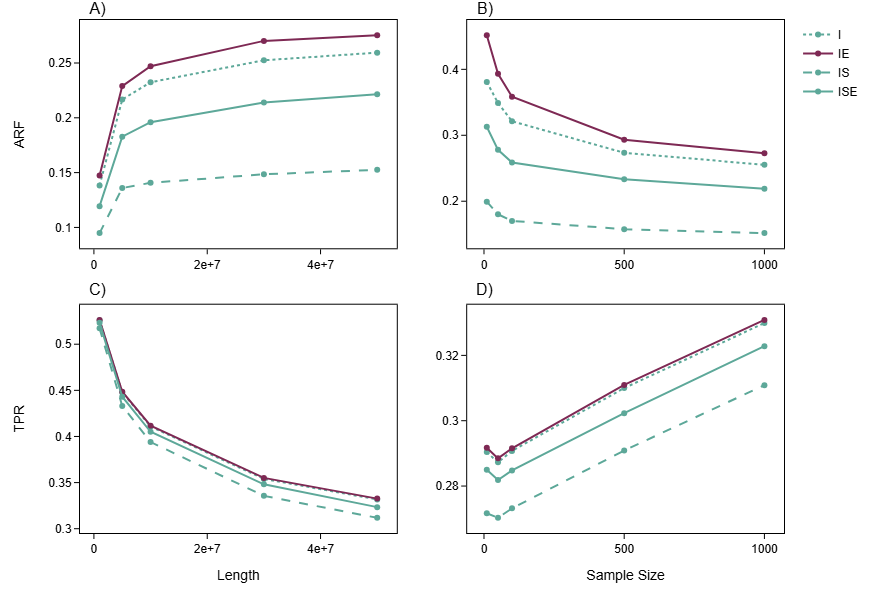

In [34]:
f = make_subplots(rows = 2, cols =2,
                  vertical_spacing=0.11,
                  subplot_titles=['A)','B)','C)','D)'])
for (i, name, group, color, dash, boo) in zip([6,7,8,9], 
                                         ['I','IE','IS', 'ISE'],
                                         ['I', 'I', 'I', 'I'],
                                         ['lgreen', 'wine','lgreen', 'lgreen'],
                                         ['dot', None, 'dash', None],
                                         [True, False, False, False]):
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=True), row=1, col=1)
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_tp.iloc[i].values[1:],
        mode='lines+markers',line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=1)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=1, col=2)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_tp.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color], dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=2)
f.update_xaxes(title='Sample Size', row=2, col=2)
f.update_yaxes(title='ARF', row=1, col=1)
f.update_yaxes(row=1,col=2)
f.update_yaxes(title='TPR', row=2,col=1)
f.update_yaxes(row=2,col=2)
f.update_xaxes(title='Length', row=2,col=1, exponentformat='e')
f.update_xaxes(row=1, col=1, exponentformat='e')

f.update_layout(width=118.11*6.5, height=118.11*5)
# f.layout.annotations[0].update(x=-0.03)
# f.layout.annotations[2].update(x=-0.03)
# f.layout.annotations[1].update(x=0.525)
# f.layout.annotations[3].update(x=0.525)
f.layout.annotations[0].update(x=0.025,y=1.001)
f.layout.annotations[2].update(x=0.025,y=0.455)
f.layout.annotations[1].update(x=0.575,y=1.001)
f.layout.annotations[3].update(x=0.575,y=0.455)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
f.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
f.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
f.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

f.show()

f.write_image('figure6-ARF-TPR-plt-supp.pdf', format='pdf', width=118.11*6.5, height=4.5*118.11)